# Transpilation

It is a process of rewriting a given circuit to match the topology of a specific quantum device, and optimize the circuit. The default transpilation is done by "transpile" function

Example 0: Simple transpilation

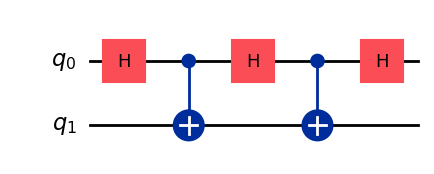

In [9]:
from qiskit import QuantumCircuit, transpile

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.h(0)
qc.cx(0, 1)
qc.h(0)

t_qc = transpile(qc, optimization_level=1)
t_qc.draw('mpl')

Example 1: Basic Transpilation for Simulator

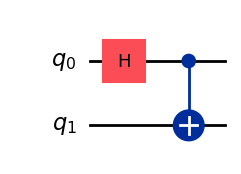

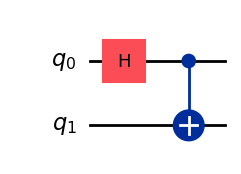

In [12]:
from qiskit import QuantumCircuit,transpile
from qiskit_aer import AerSimulator

# Step 1: Create a simple circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

# Step 2: Transpile for a simulator backend
sim_backend = AerSimulator()
t_qc = transpile(qc, backend=sim_backend, optimization_level=1)

# Step 3: Show original and transpiled circuit
display(qc.draw('mpl'))

display(t_qc.draw('mpl'))


Example 2: Transpilation for fake hardware backend

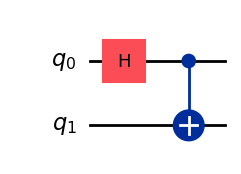

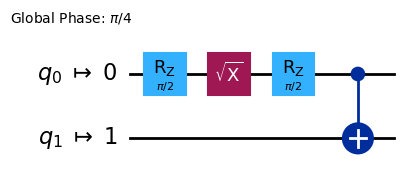

In [15]:
from qiskit_ibm_runtime.fake_provider import FakeManilaV2

backend = FakeManilaV2()  # 5-qubit mock backend

# Sample circuit with non-adjacent CNOT
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)  # Not directly allowed in most real hardware
qc.draw('mpl')

# Transpile with device constraints
t_qc = transpile(qc, backend=backend, optimization_level=1)

display(qc.draw("mpl"))
display(t_qc.draw('mpl'))


Example 3: Comparing optimization levels


--- Optimization level 0 ---


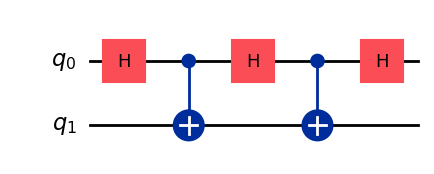


--- Optimization level 1 ---


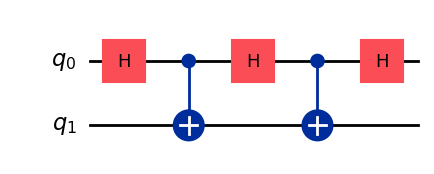


--- Optimization level 2 ---


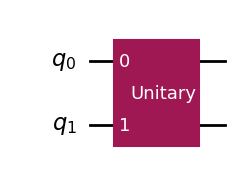


--- Optimization level 3 ---


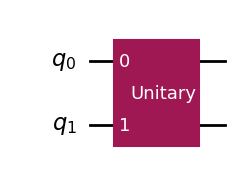

In [11]:
from qiskit import QuantumCircuit, transpile

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.h(0)
qc.cx(0, 1)
qc.h(0)

for level in range(4):
    t_qc = transpile(qc, optimization_level=level)
    print(f"\n--- Optimization level {level} ---")
    display(t_qc.draw('mpl'))


Optimization Levels:

0 - Keeps gate structure nearly identical

1 - Light simplifications

2 - Standard reductions

3 - Full rewrite into shortest equivalent circuit

## Transpilation with advance transpile options

Apart from these basic transpile usages, there are more advanced versions of transpile using Passes, PassManagers and StagedPassManagers.

PassManager is one of the advanced transpilation controls in Qiskit that allows you to customize the transpilation process beyond the transpile() function, giving you full control over the passes applied to a quantum circuit. A PassManager is a pipeline that defines how a circuit is transformed — step-by-step — using passes like mapping, optimization, unrolling, etc.

Here, we focus only on one type of passmanager, which is "preset staged passmanager".

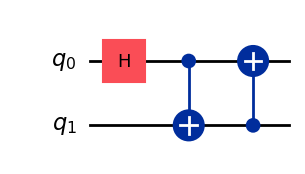

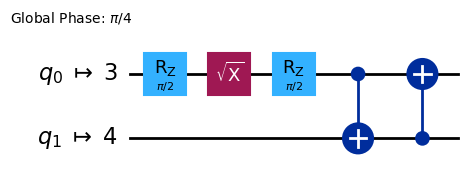

In [18]:
from qiskit import QuantumRegister, QuantumCircuit
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeManilaV2

backend = FakeManilaV2() 
 
# Create a circuit
qubits = QuantumRegister(2, name="q")
circuit = QuantumCircuit(qubits)
a, b = qubits
circuit.h(a)
circuit.cx(a, b)
circuit.cx(b, a)

pass_manager = generate_preset_pass_manager(optimization_level=3, backend=backend)

# Transpile it by calling the run method of the pass manager
transpiled = pass_manager.run(circuit)
 
# Draw it, excluding idle qubits from the diagram
display(circuit.draw("mpl"))
display(transpiled.draw("mpl", idle_wires=False))